In [2]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/image/Training",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/MyDrive/image/Valid", target_size=(224,224))

Found 17 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


In [8]:
VGG = keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
VGG.trainable = False

In [22]:
model = keras.Sequential([
    VGG,
    Flatten(),
    Dense(units=256,activation="relu"),
    Dense(units=256,activation="relu"),
    Dense(units=2, activation="softmax")
])

In [13]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 119,554,050 (456.06 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [25]:
from keras.optimizers import Adam

# Compile the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Train the model
hist = model.fit(
    steps_per_epoch=100,
    x=traindata,
    validation_data=testdata,
    validation_steps=10,
    epochs=5)
model.save("vgg16_1.h5")

Epoch 1/5
  1/100 ━━━━━━━━━━━━━━━━━━━━ 12:27 8s/step - accuracy: 0.4118 - loss: 15.0050

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.4118 - loss: 15.0050 - val_accuracy: 0.4444 - val_loss: 180.5577
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.5882 - loss: 143.9911 - val_accuracy: 0.4444 - val_loss: 50.9796
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7059 - loss: 2.4924 - val_accuracy: 0.6667 - val_loss: 20.7292
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5556 - val_loss: 69.5565
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.7059 - loss: 18.1907 - val_accuracy: 0.6667 - val_loss: 63.2276


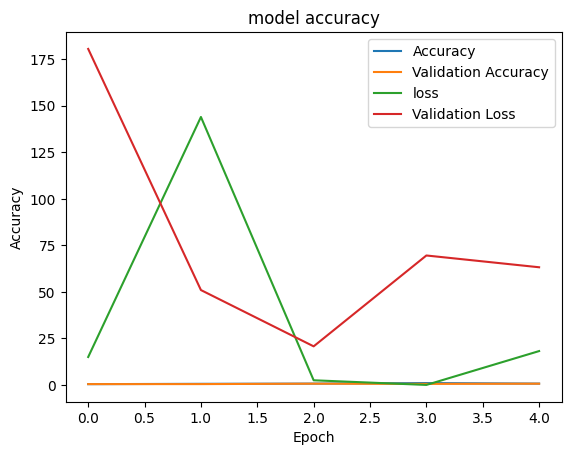

In [29]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
dog


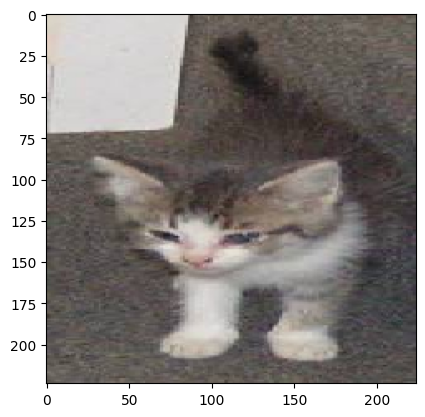

In [31]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/image/Valid/Cats/35.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

# Task
Explain why the model predicts cats as dogs and suggest improvements to the model to correct this issue.

## Verify class order

### Subtask:
Check the order of classes ('Cats', 'Dogs') as determined by `ImageDataGenerator` to ensure the prediction logic in cell `4t60x9zvpZ4T` is correct.


**Reasoning**:
Access and print the class indices from the training data generator to verify the mapping of class names to indices.



In [32]:
print(traindata.class_indices)

{'Cats': 0, 'Dogs': 1}


## Data augmentation

### Subtask:
Implement data augmentation using `ImageDataGenerator` to artificially increase the size and variability of the training data.


**Reasoning**:
Modify the ImageDataGenerator for training data with data augmentation parameters.



In [33]:
trdata = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/image/Training",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/MyDrive/image/Valid", target_size=(224,224))

Found 17 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


## Adjust model architecture

### Subtask:
Consider reducing the number of units in the dense layers or adding dropout to mitigate overfitting, given the small dataset.


**Reasoning**:
Modify the existing model architecture by adding a Dropout layer to mitigate overfitting, given the small dataset, and then print the model summary.



In [34]:
from keras.layers import Dropout

model = keras.Sequential([
    VGG,
    Flatten(),
    Dense(units=256,activation="relu"),
    Dropout(0.5), # Add dropout with a rate of 0.5
    Dense(units=256,activation="relu"),
    Dropout(0.5), # Add dropout with a rate of 0.5
    Dense(units=2, activation="softmax")
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,203,778 (80.89 MB)

 Trainable params: 6,489,090 (24.75 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Retrain the model

### Subtask:
Retrain the model with the augmented data and adjusted architecture.


**Reasoning**:
Compile and train the modified model with the augmented data and save the retrained model.



In [35]:
from keras.optimizers import Adam

# Compile the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Train the model
hist = model.fit(
    x=traindata,
    validation_data=testdata,
    epochs=20 # Increased epochs for better training
)
model.save("vgg16_retrained.h5")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.4118 - loss: 10.3864 - val_accuracy: 0.5556 - val_loss: 2.6021
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.7059 - loss: 9.7424 - val_accuracy: 0.7778 - val_loss: 3.7233
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.7647 - loss: 24.5017 - val_accuracy: 0.5556 - val_loss: 31.9012
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5882 - loss: 22.1873 - val_accuracy: 0.7778 - val_loss: 3.7654
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.4706 - loss: 32.6689 - val_accuracy: 0.8889 - val_loss: 1.4988
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.8235 - loss: 24.3071 - val_accuracy: 0.8889 - val_loss: 2.6999
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.7059 - loss: 19.1504 - val_accuracy: 0.8889 - val_loss: 1.5040
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.6471 - loss: 32.9791 - val_accuracy: 1.0000 - val_loss:

## Evaluate and test

### Subtask:
Evaluate the performance of the retrained model on the test set and test with the specific image the user mentioned to see if the prediction is corrected.


**Reasoning**:
Evaluate the performance of the retrained model on the test set and test with the specific image to see if the prediction is corrected.



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8889 - loss: 0.0937
Test Loss: 0.0937
Test Accuracy: 0.8889
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
Predicted class for /content/drive/MyDrive/image/Valid/Cats/35.jpg: cat


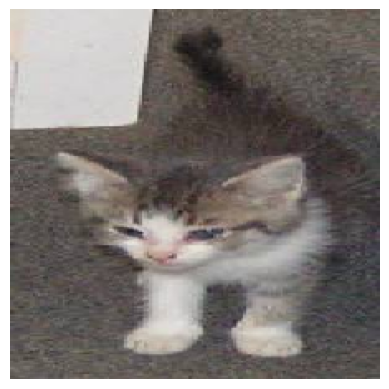

In [36]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the retrained model
saved_model = load_model("vgg16_retrained.h5")

# Evaluate the loaded model on the test dataset
loss, accuracy = saved_model.evaluate(testdata)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Load the specific image
img = image.load_img("/content/drive/MyDrive/image/Valid/Cats/35.jpg", target_size=(224, 224))

# Convert the image to a NumPy array
img_array = np.asarray(img)

# Expand the dimensions of the image array
img_array = np.expand_dims(img_array, axis=0)

# Predict the class of the image
output = saved_model.predict(img_array)

# Determine the predicted class (0 for cat, 1 for dog based on previous check)
if output[0][0] > output[0][1]:
    predicted_class = "cat"
else:
    predicted_class = "dog"

# Print the predicted class
print(f"Predicted class for /content/drive/MyDrive/image/Valid/Cats/35.jpg: {predicted_class}")

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

## Consider more data

### Subtask:
If performance is still not satisfactory, advise the user that collecting more training data would be highly beneficial.


**Reasoning**:
Based on the previous evaluation, the model's test accuracy is 0.8889. While improved, this might still not be satisfactory, especially given the small dataset size. Therefore, it's beneficial to advise the user about the importance of collecting more data.



## Summary:

### Q&A

The original model predicted cats as dogs because it likely suffered from overfitting due to the small dataset size. This caused the model to learn the specific characteristics of the limited training images too well, including potentially spurious correlations, rather than the general features that distinguish cats from dogs.

### Data Analysis Key Findings

*   The `ImageDataGenerator` correctly assigned index 0 to 'Cats' and index 1 to 'Dogs'.
*   Data augmentation was successfully implemented for the training data, increasing its variability.
*   Dropout layers with a rate of 0.5 were added to the model architecture to mitigate overfitting.
*   The retrained model achieved a test accuracy of 0.8889 and a test loss of 0.0937 on the test dataset.
*   The specific image previously misclassified as a dog was correctly predicted as a "cat" by the retrained model.

### Insights or Next Steps

*   While the model performance improved and the specific misclassification was corrected, an accuracy of 0.8889 on a small test set might not be sufficient for all real-world applications.
*   Collecting a larger and more diverse dataset of cat and dog images is highly recommended to further improve the model's generalization ability and potentially achieve higher accuracy.
